In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
data = pd.read_csv("../datasets/bank/bank.csv", sep=";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [67]:
data.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,4119.000000,4119,4119,4119,4119,4119,4119,4119,4119,4119,...,4119.000000,4119.000000,4119.000000,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,1012,2509,1264,3315,2175,3349,2652,1378,860,...,NaN,NaN,NaN,3523,NaN,NaN,NaN,NaN,NaN,3668
mean,40.113620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.537266,960.422190,0.190337,NaN,0.084972,93.579704,-40.499102,3.621356,5166.481695,NaN
std,10.313362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.568159,191.922786,0.541788,NaN,1.563114,0.579349,4.594578,1.733591,73.667904,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.635000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.334000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [68]:
data.shape

(4119, 21)

In [69]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [70]:
data.drop('default', axis=1, inplace=True)

**transformo las variables categóricas del campo "education"**

In [71]:
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [72]:
data['education'] = np.where(data['education']=="basic.9y", "basic", data['education'])
data['education'] = np.where(data['education']=="basic.6y", "basic", data['education'])
data['education'] = np.where(data['education']=="basic.4y", "basic", data['education'])

In [73]:
data['education'] = np.where(data['education']=="high.school", "high_schol", data['education'])
data['education'] = np.where(data['education']=="university.degree", "univ_degree", data['education'])
data['education'] = np.where(data['education']=="professional.course", "prof_course", data['education'])
data['y'] = np.where(data['y']=='no', 0, 1)


In [74]:
data['education'].unique()

array(['basic', 'high_schol', 'univ_degree', 'prof_course', 'unknown',
       'illiterate'], dtype=object)

**realizo un agrupamiento por 'y' para un análisis exploratorio inicial**

* se observa que la media de edad de los compradores es > 40.
* pdays: los que compran tuvieron contacto más reciente con el dep. de ventas de la empresa.
* caso extraño: campaing. los que tuvieron más contacto, compraron menos.


In [75]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


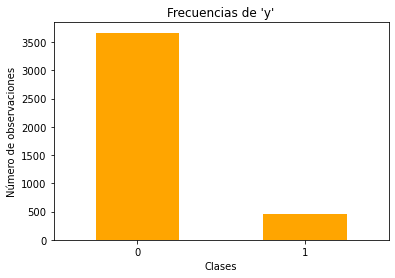

In [218]:
count_classes = pd.value_counts(data['y'], sort = True)
count_classes.plot(kind = 'bar', rot=0, color='orange')
plt.xticks(range(2))
plt.title("Frecuencias de 'y'")
plt.xlabel("Clases")
plt.ylabel("Número de observaciones");

**otro agrupamiento para análisis**

In [76]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
high_schol,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
prof_course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
univ_degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


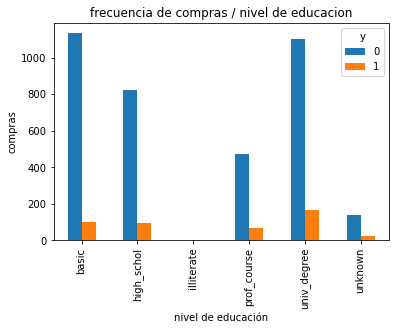

In [77]:
pd.crosstab(data.education, data.y).plot(kind='bar')
plt.title("frecuencia de compras / nivel de educacion")
plt.xlabel("nivel de educación")
plt.ylabel("compras")
plt.show()

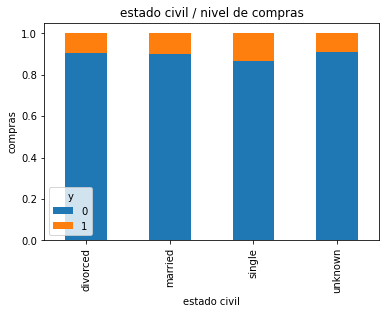

In [78]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(axis=1).astype("float"), axis=0).plot(kind='bar', stacked=True)
plt.title("estado civil / nivel de compras")
plt.xlabel("estado civil")
plt.ylabel("compras")
plt.show()

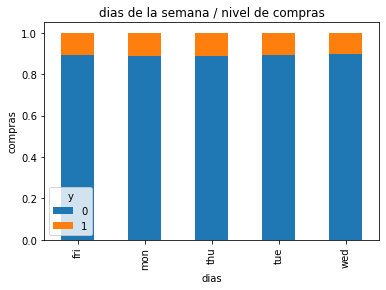

In [79]:
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(axis=1).astype("float"), axis=0).plot(kind='bar', stacked=True)
plt.title("dias de la semana / nivel de compras")
plt.xlabel("dias")
plt.ylabel("compras")
plt.show()

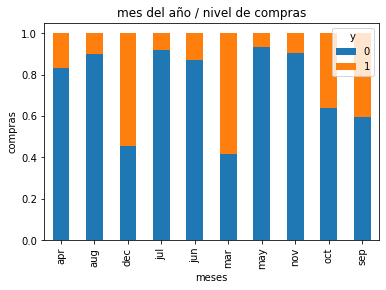

In [80]:
table = pd.crosstab(data.month, data.y)
table.div(table.sum(axis=1).astype("float"), axis=0).plot(kind='bar', stacked=True)
plt.title("mes del año / nivel de compras")
plt.xlabel("meses")
plt.ylabel("compras")
plt.show()

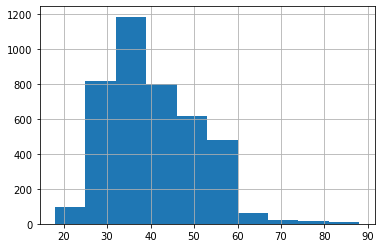

In [81]:
data.age.hist()
plt.show()

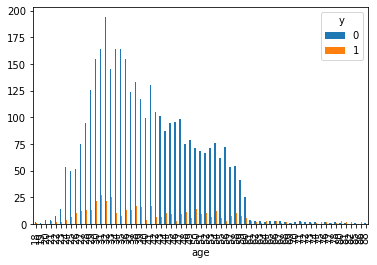

In [82]:
pd.crosstab(data.age, data.y).plot(kind='bar')

# Conversión de variables categóricas

In [83]:
categorias = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 
              'month', 'day_of_week', 'poutcome']

In [84]:
for category in categorias:
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new
data.columns.values

array(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic',
       'education_high_schol', 'education_illiterate',
       'education_prof_course', 'education_univ_degree',
       'education_unknown', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'mo

**quito las columnas que me sobran**

In [85]:
data_vars = data.columns.values.tolist()
to_keep = [v for v in data_vars if v not in categorias]

In [86]:
bank_data = data[to_keep]

In [87]:
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_high_schol',
       'education_illiterate', 'education_prof_course',
       'education_univ_degree', 'education_unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue'

**tengo que armar la x e y. como son muchas columnas en la X, uso un bucle:**

In [88]:
data_banks_features = bank_data.columns.values.tolist() #lista con todas las columnas del dataframe
y = ['y'] #defino el encabezado de la y
#ahora recorro la lista y tomo todas aquellas columnas (que son muchas) que no sean "y"
cols = [v for v in data_banks_features if v not in y]

In [89]:
#levanto los datos del dataframe
y = bank_data['y']
x = bank_data[cols]

In [90]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [91]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

**utilizo a RFE para que me indique las mejores features**

In [92]:
n = 12
lr = LogisticRegression()
rfe = RFE(lr, n_features_to_select=n)
rfe = rfe.fit(x, y)

In [93]:
rfe.ranking_

array([16,  1,  1, 15, 10,  1,  1,  1,  5,  1, 38,  7,  4, 34, 12, 17,  3,
       30, 45, 21, 25, 18, 13, 32, 31, 47, 24, 23, 11, 22, 33, 40, 29, 37,
       41, 20, 14, 39,  1,  1, 35,  8, 19, 42,  1,  1,  1,  2, 43, 36, 27,
       44, 46, 28,  9,  6, 26,  1])

**concateno 3 datos:**
1. el nombre de las columnas: data_banks_features
2. el ranking de RFE (con valores de 1 en adelante [los 1 son los válidos])
3. el support de RFE (True or False)

In [94]:
resultado = list(zip(data_banks_features, rfe.ranking_, rfe.support_))
resultado

[('age', 16, False),
 ('duration', 1, True),
 ('campaign', 1, True),
 ('pdays', 15, False),
 ('previous', 10, False),
 ('emp.var.rate', 1, True),
 ('cons.price.idx', 1, True),
 ('cons.conf.idx', 1, True),
 ('euribor3m', 5, False),
 ('nr.employed', 1, True),
 ('y', 38, False),
 ('job_admin.', 7, False),
 ('job_blue-collar', 4, False),
 ('job_entrepreneur', 34, False),
 ('job_housemaid', 12, False),
 ('job_management', 17, False),
 ('job_retired', 3, False),
 ('job_self-employed', 30, False),
 ('job_services', 45, False),
 ('job_student', 21, False),
 ('job_technician', 25, False),
 ('job_unemployed', 18, False),
 ('job_unknown', 13, False),
 ('marital_divorced', 32, False),
 ('marital_married', 31, False),
 ('marital_single', 47, False),
 ('marital_unknown', 24, False),
 ('education_basic', 23, False),
 ('education_high_schol', 11, False),
 ('education_illiterate', 22, False),
 ('education_prof_course', 33, False),
 ('education_univ_degree', 40, False),
 ('education_unknown', 29, False)

**bucle para tomar unicamente aquellas features cuyo rank==1**

In [95]:
new_cols=[]
for cols, rank, support in resultado:
    if rank == 1:
        new_cols.append(cols)
    
new_cols        

['duration',
 'campaign',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed',
 'loan_yes',
 'contact_cellular',
 'month_jul',
 'month_jun',
 'month_mar',
 'poutcome_nonexistent']

# Implementamos el modelo son statsmodels.api

In [96]:
import statsmodels.api as sm

**preparo las nuevas variables**

In [127]:
y = bank_data['y']
x = bank_data[new_cols]

In [128]:
result = sm.Logit(y, x).fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.204501
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:               Logit             Pseudo R-squared:  0.408      
Dependent Variable:  y                 AIC:               1708.6815  
Date:                2020-09-23 11:29  BIC:               1784.5619  
No. Observations:    4119              Log-Likelihood:    -842.34    
Df Model:            11                LL-Null:           -1422.9    
Df Residuals:        4107              LLR p-value:       3.7918e-242
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      8.0000                                          
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
duration              0.0051   0.0002  20.5043 0.0000  0.0046  0.0056
campaign             -0.0915   0.0441  -2.0774 0.0378 -0.1779 -0.0052
emp.var.rate         -0.2778   0.0577  -4.8099 0.0000 -0.3909 -0.1646
cons.price.idx        0.5296   0.0507  10.4504 0.0000  0.4303  0.6290
cons.conf.idx         0.0848   0.0120   7.0553 0.0000  0.0612  0.1083
nr.employed          -0.0099   0.0009 -10.7224 0.0000 -0.0117 -0.0081
loan_yes             -0.0344   0.1794  -0.1916 0.8480 -0.3861  0.3173
contact_cellular      1.1243   0.2126   5.2887 0.0000  0.7076  1.5409
month_jul             0.3092   0.2203   1.4038 0.1604 -0.1225  0.7409
month_jun             1.2311   0.2009   6.1288 0.0000  0.8374  1.6248
month_mar             2.3810   0.3840   6.2005 0.0000  1.6284  3.1336
poutcome_nonexistent -0.1897   0.1630  -1.1642 0.2443 -0.5091  0.1297
=====================================================================

"""

In [99]:
from sklearn import linear_model
from sklearn.feature_selection import f_regression

In [100]:
logit_model = linear_model.LogisticRegression()

In [101]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
logit_model.fit(x, y)

LogisticRegression()

In [102]:
pvalues = f_regression(x, y)

In [103]:
data_stats = pd.DataFrame(list(zip(new_cols, np.transpose(logit_model.coef_), pvalues[1], pvalues[0])), 
                          columns=['Feature', 'Coef', 'P-value', 'F-stats'])
print("R2: ",logit_model.score(x, y))
print(data_stats)

R2:  0.9126001456664239
                 Feature                     Coef        P-value     F-stats
0               duration     [1.2872126231949543]  1.902622e-174  874.494742
1               campaign   [-0.23122917423179118]   1.013101e-06   23.975513
2           emp.var.rate    [-0.5984274482107674]   7.822982e-77  359.027148
3         cons.price.idx     [0.4070742669055926]   2.550056e-10   40.191766
4          cons.conf.idx     [0.4002984395469119]   4.786306e-04   12.216702
5            nr.employed    [-0.6122744872886768]  1.842127e-118  571.902853
6               loan_yes  [-0.012549824938443643]   5.140891e-01    0.425809
7       contact_cellular      [0.549054539571327]   8.170915e-19   79.220260
8              month_jul    [0.10059547088470405]   1.281018e-02    6.200553
9              month_jun    [0.37839154546412795]   1.374457e-01    2.207184
10             month_mar    [0.25833655078832884]   1.843943e-26  114.899459
11  poutcome_nonexistent   [-0.06680844596184518]   

## Cómo interpretar los resultados.

miremos los coeficientes:
1. month_jun: cada vez que se contacta al cliente en el mes de junio, aumentan un 0.25 las probabilidades de ventas
2. contact_cellular: si se contacta por celular, las probabilidades aumentan en 0.54
3. los que están en negativo decrementan las posibilidades

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True, random_state=666)

In [106]:
lm = linear_model.LogisticRegression()
lm.fit(x_train, y_train)

LogisticRegression()

In [107]:
print("R2: ",lm.score(x_train, y_train))

R2:  0.9158303658141793


## al ser una regresion logística, analizamos la probabilidad de una respuesta negativa o positiva:

**1. la primera columna del array devuelve qué tan seguro estoy de la predicción**

**2. la segunda:**
    * la probabilidad del valor de salida: en este caso, la compra o la no compra
    * si es > 0.05 (valor x defecto) se cataloga como verdadera (compra)
    * si es < 0.05 es 0 (no compra)
    

In [108]:
proba = lm.predict_proba(x_test)
proba

array([[0.99727718, 0.00272282],
       [0.99550848, 0.00449152],
       [0.96944183, 0.03055817],
       ...,
       [0.99117704, 0.00882296],
       [0.97963802, 0.02036198],
       [0.98583757, 0.01416243]])

**realizamos la predicción (conjunto de test)**

nos devuelve un array de 0,1 (en este caso). al comparar con lm.predict_proba() vemos que los valores < 0.05 tienen como resultado un 0 con este lm.predict()

In [109]:
predictions = lm.predict(x_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

**el valor predeterminado de ese límite de aceptación (0.05), lo puedo configurar, trabajando con él**:
tomo la segunda columna del array, que contiene las probabilidades.

dejo al threshold como variable, así puedo ir jugando con ese valor límite:

armo un df en el cual coloco el predict.proba(x_test); 
en la columna "probabilidad" coloco 1 o 0, dependiendo si el valor de predict_proba es mayor al threshold

In [150]:
threshold = 0.1
probs = proba[:, 1]
probs_df = pd.DataFrame(probs, columns=['predict_proba'])
probs_df['probabilidad'] = np.where(probs_df['predict_proba']>threshold, 1, 0)
probs_df['resultado'] = np.where(probs_df['predict_proba']>threshold, "compra", "no compra")
probs_df.head()

,predict_proba,probabilidad,resultado
0,0.002723,0,no compra
1,0.004492,0,no compra
2,0.030558,0,no compra
3,0.005605,0,no compra
4,0.013389,0,no compra


**analizo la cantidad de compras y NO compras**

In [151]:
a = probs_df[probs_df['probabilidad'] == 0]
print("cantidad de NO compras: ", a['probabilidad'].count())
print("cantidad de compras: ", len(probs_df)-a['probabilidad'].count())
print("registros totales: ", len(probs_df))

cantidad de NO compras:  803
cantidad de compras:  227
registros totales:  1030


In [152]:
#otra forma, con una crosstab. coloco la suma total de los registros
a = pd.crosstab(probs_df.probabilidad, columns=['count'])
a.append([a['count'].sum()])

,count,0
0,803.0,NaN
1,227.0,NaN
0,NaN,1030.0


### realizo un test de presición:

In [153]:
from sklearn.metrics import accuracy_score
res = accuracy_score(y_test, predictions)
print("accuracy score", res)
print("R2: ", lm.score(x, y))

accuracy score 0.9087378640776699
R2:  0.9126001456664239


### ahora pruebo modificando el threshold

**al hacer más bajo este valor límite, entran más casos como 1 (ventas)**

In [154]:
probs = proba[:, 1]
probs_df = pd.DataFrame(probs, columns=['predict_proba'])
probs_df['probabilidad'] = np.where(probs_df['predict_proba']>threshold, 1, 0)
probs_df['resultado'] = np.where(probs_df['predict_proba']>threshold, "compra", "no compra")
threshold = 0.05
probs_df.head()

,predict_proba,probabilidad,resultado
0,0.002723,0,no compra
1,0.004492,0,no compra
2,0.030558,0,no compra
3,0.005605,0,no compra
4,0.013389,0,no compra


In [155]:
a = probs_df[probs_df['probabilidad'] == 0]
print("cantidad de NO compras: ", a['probabilidad'].count())
print("cantidad de compras: ", len(probs_df)-a['probabilidad'].count())
print("registros totales: ", len(probs_df))

cantidad de NO compras:  803
cantidad de compras:  227
registros totales:  1030


**pruebo otra vez, llevando el threshold a 0.01 y los compradores suben a 520**

In [156]:
probs = proba[:, 1]
probs_df = pd.DataFrame(probs, columns=['predict_proba'])
probs_df['probabilidad'] = np.where(probs_df['predict_proba']>threshold, 1, 0)
probs_df['resultado'] = np.where(probs_df['predict_proba']>threshold, "compra", "no compra")
threshold = 0.01
probs_df.head()

,predict_proba,probabilidad,resultado
0,0.002723,0,no compra
1,0.004492,0,no compra
2,0.030558,0,no compra
3,0.005605,0,no compra
4,0.013389,0,no compra


In [157]:
a = probs_df[probs_df['probabilidad'] == 0]
print("cantidad de NO compras: ", a['probabilidad'].count())
print("cantidad de compras: ", len(probs_df)-a['probabilidad'].count())
print("registros totales: ", len(probs_df))

cantidad de NO compras:  725
cantidad de compras:  305
registros totales:  1030


# Validación cruzada

In [158]:
from sklearn.model_selection import cross_val_score

nota: si al cv=10 lo llevo al cv=20 los resultados no mejoran significativamente

In [159]:
scores = cross_val_score(linear_model.LogisticRegression(), x, y, scoring='accuracy', cv=10)
print("scores: ", scores)
print("mean_scores: ",np.mean(scores))

scores:  [0.91504854 0.89805825 0.90776699 0.91990291 0.9223301  0.91019417
 0.90291262 0.90776699 0.91990291 0.90024331]
mean_scores:  0.9104126804148063


# Matriz de Confusión y Curvas ROC

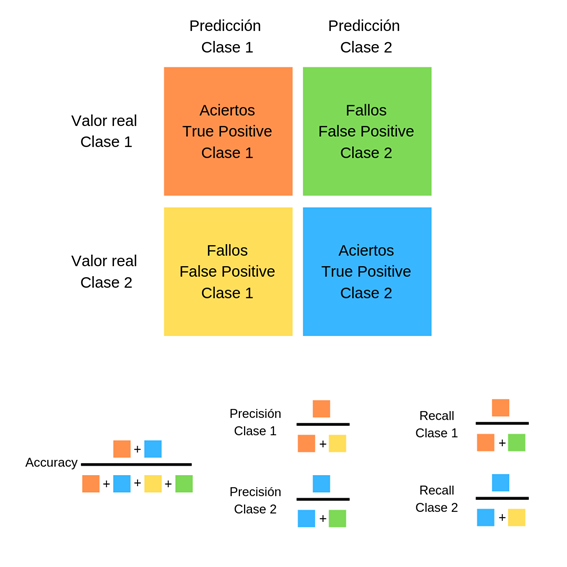

In [160]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True, random_state=666)

In [161]:
lm = linear_model.LogisticRegression()
lm.fit(x_train, y_train)
probs = lm.predict_proba(x_test) #tiro la prediccion

In [162]:
probs = proba[:, 1]
probs_df = pd.DataFrame(probs, columns=['predict_proba'])
probs_df['probabilidad'] = np.where(probs_df['predict_proba']>threshold, 1, 0)
probs_df['valor_actual'] = list(y_test)
threshold = 0.05
probs_df.head()

,predict_proba,probabilidad,valor_actual
0,0.002723,0,0
1,0.004492,0,0
2,0.030558,1,0
3,0.005605,0,0
4,0.013389,1,0


In [167]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [220]:
y_pred = lm.predict(x_test) #realizo la predicción
cm = confusion_matrix(y_test, y_pred) #matriz de confusión

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       931
           1       0.56      0.35      0.43        99

    accuracy                           0.91      1030
   macro avg       0.75      0.66      0.69      1030
weighted avg       0.90      0.91      0.90      1030



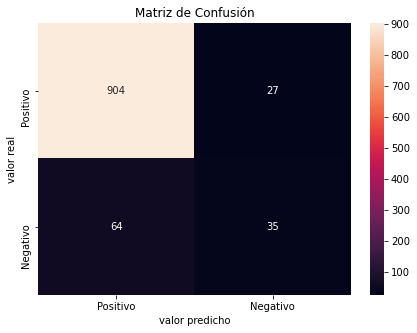

In [223]:
labels = ['Positivo', 'Negativo'] #cargo las etiquetas que utilizaré en el gráfico
plt.figure(figsize=(7, 5))
sns.heatmap(cm, xticklabels=labels, yticklabels=labels, annot=True, fmt="d")
plt.title("Matriz de Confusión")
plt.ylabel("valor real")
plt.xlabel("valor predicho")
print (classification_report(y_test, y_pred)) #datos para generar el reporte

### classification_report a mano

In [222]:
p = 904/(904+35)
r = 904/(904+27)
print("-presición clase 1 (vp / (vp+vn))", p)
print("-recall clase    1 (vp / (vp+fn))", r)
print("-mean ", np.mean([p,r]))
print("*"*60)
p = 35/(35+27)
r = 35/(35+64)
print("-presición clase 2 (vp / (vp+vn))", p)
print("-recall clase    2 (vp / (vp+fn))", r)
print("-mean ", np.mean([p,r]))
print("*"*60)
print("ACCURACY ", (904+35)/(904+35+64+27))

-presición clase 1 (vp / (vp+vn)) 0.9627263045793397
-recall clase    1 (vp / (vp+fn)) 0.9709989258861439
-mean  0.9668626152327418
************************************************************
-presición clase 2 (vp / (vp+vn)) 0.5645161290322581
-recall clase    2 (vp / (vp+fn)) 0.35353535353535354
-mean  0.4590257412838058
************************************************************
ACCURACY  0.9116504854368932
